# Linear Regression

-  Implement linear regression from scratch using batch gradient descent on a toy dataset.

-  Apply linear regression using Scikit-Learn on a real-world dataset. Compare with the scratch implementation.





## Implement linear regression from scratch using batch gradient descent on a [toy dataset](https://www.geeksforgeeks.org/data-science/toy-dataset-explanation-and-application/)

<https://www.youtube.com/watch?v=qg4PchTECck>

[[1]](https://medium.com/@jaleeladejumo/gradient-descent-from-scratch-batch-gradient-descent-stochastic-gradient-descent-and-mini-batch-def681187473)

A loss function is used to evaluate the performance of a model on a single training observation.Cost Function: It is commonly computed as the average or sum of the individual loss function values across the full training dataset. T

Gradient descent works by using the gradient, which points in the direction of steepest increase of the cost function. Since we want to minimize the cost, we move in the <mark style="background-color: #0099cc;">opposite</mark> direction of the gradient.

Gradient descent is a prominent optimization approach for minimising a model’s cost function

![URL image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Htv890e-RRHududhNNP80A.png)

In batch gradient descent, the loss for all the points in the training set are averaged, and the model (weight) is updated only after evaluating all the training examples in a single training iteration

Steps:
- Initialise parameters- Run some number of epochs

- Use parameters to make predictions

- Compute and store losses

- Compute gradients of the loss with respect to parameters

- Use gradients to update the parameters

- End


In [131]:
%config IPCompleter.greedy=True
%pdb on  # Automatic debugger on error

Incorrect argument. Use on/1, off/0, or nothing for a toggle.


In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:

# Create a toy dataset
def create_toy_dataset():
    # True parameters we're trying to learn
    true_theta = np.array([2.5, -1.8, 0.7])
    
    # Generate random features
    np.random.seed(42)  # For reproducible results
    N = 100  # Number of samples
    X = np.column_stack([
        np.ones(N),  # Bias term (intercept)
        np.random.randn(N) * 2,  # Feature 1
        np.random.randn(N) * 1.5  # Feature 2
    ])
    
    # Generate y with some noise: y = X @ true_theta + noise
    noise = np.random.randn(N) * 0.5
    y = X @ true_theta + noise
    
    return X, y, true_theta


In [134]:
#Linear function

def linear_function(X, theta):
 '''
 1D arrays don’t distinguish between rows and columns
 - matrix multiplications become ambiguous
 - gradient descent code breaks or silently produces wrong results.
 '''
 assert X.ndim > 1, f"X must be 2D (N, D). Got ndim={X.ndim}, shape={X.shape}"
 assert theta.ndim > 1, f"theta must be 2D (D, 1). Got ndim={theta.ndim}, shape={theta.shape}"
 return np.dot(X, theta)

#Loss function (MSE)

def mean_squared_error(ytrue, ypred):
  return np.mean((ytrue - ypred)**2)


#initialize the weight(parameter)
'''
start gradient descent from zeros
D = number of features
'''
def initialize_theta(D): 
  return np.zeros([D, 1])


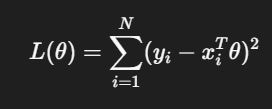

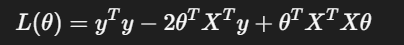
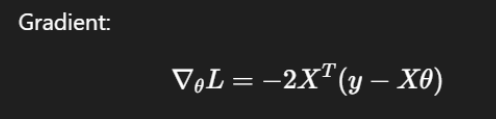

In [135]:
# compute the gradient of loss (derivative of the loss with respect to the weight)
'''
The gradient points in the direction where the loss increases the most,
we go in the opposite so there is a negative sign
'''
def batch_gradient(X, y, theta):
  return -2.0 * np.dot(X.T, (y - linear_function(X, theta)))


In [136]:
#Updating function: gradient descent
def update_function(theta, grads, step_size):
  return theta - step_size * grads

### Batch Gradient Descent



In [ ]:
def train_batch_gradient_descent(X, y, num_epochs, step_size=0.1, plot_every=1):
    N, D = X.shape
    theta = initialize_theta(D)  # This should return shape (D,) or (1, D)
    losses = []
    thetas = []  # Store parameter history
    
    print(f"Initial theta: {theta}, shape: {theta.shape}")
    
    for epoch in range(num_epochs):
        ypred = linear_function(X, theta)
        loss = mean_squared_error(y, ypred)
        grads = batch_gradient(X, y, theta)
        print(f"grads shape: {grads.shape}")
        
        theta = update_function(theta, grads, step_size)
        print(f"theta shape after update: {theta.shape}")
        
        losses.append(loss)
        thetas.append(theta.copy())
        
        # if epoch % plot_every == 0:
        #     print(f"Epoch {epoch}, loss {loss:.4f}, theta: {theta}")
    
    return losses, thetas, theta

Dataset shape: X (100, 3), y (100,)
Initial theta: [[0.]
 [0.]
 [0.]], shape: (3, 1)
grads shape: (3, 100)
theta shape after update: (3, 100)
Epoch 0, loss 20.6242, theta: [[-1.19083310e+01  5.67293232e+01  6.99993284e+00 -6.59679518e+01
   4.96953494e+01  6.59646785e+01 -1.89430661e+01  3.54869308e+00
   9.43611909e+01  4.78996275e+01  4.87807835e+01  9.43314073e+01
   4.33835685e+01  2.45998174e+02  1.67001811e+02  1.04406888e+02
   1.14466641e+02  4.63767196e-01  1.34523377e+02  1.68295202e+02
  -1.57684548e+01  2.84861052e+01  8.14592517e+01  1.07015838e+02
   9.68002365e+01  9.89026477e+01  1.12713075e+02  2.80042578e-01
   8.81856272e+01  6.72249387e+01  5.34552777e+01 -7.97596209e+01
   2.91191406e+01  1.29584624e+02 -7.09170170e+00  1.76788556e+02
  -1.73792385e+00  1.86197500e+02  1.56095392e+02  1.85021737e+01
  -6.31814252e+00  6.39641172e+01  2.96194012e+01  8.42143291e+01
   1.49908158e+02  1.14902051e+02  5.24405735e+01 -6.03756815e+01
   5.38747984e+01  1.87225386e+02  1

C:\Users\admin\AppData\Local\Temp\ipykernel_8556\2870587934.py:16: RuntimeWarning: overflow encountered in square
  return np.mean((ytrue - ypred)**2)


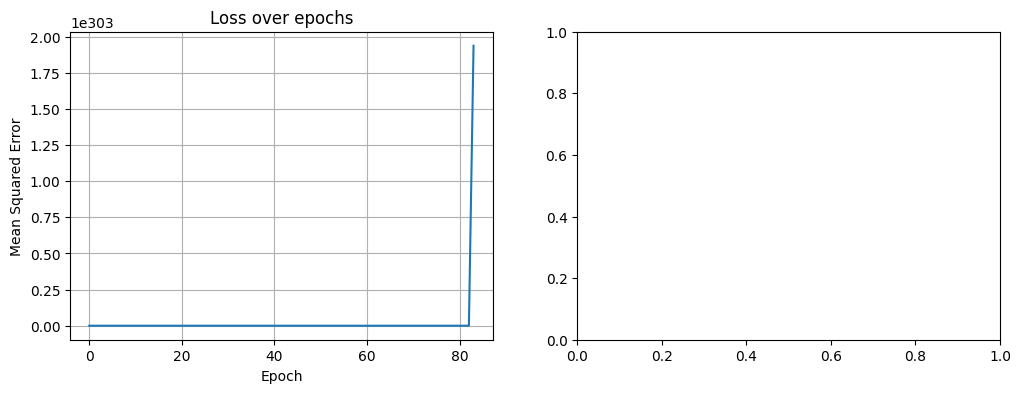

In [139]:

# Create dataset and train
X, y, true_theta = create_toy_dataset()
print(f"Dataset shape: X {X.shape}, y {y.shape}")
# print(f"True parameters: {true_theta}")

# Train the model
losses, thetas, final_theta = train_batch_gradient_descent(
    X, y, num_epochs=100, step_size=0.1, plot_every=20
)

print(f"\nFinal parameters: {final_theta.shape}")
print(f"True parameters:  {true_theta.shape}")

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.subplot(1, 2, 2)
# Plot true vs predicted for the last epoch
# ypred_final = linear_function(X, final_theta)
# plt.scatter(y, ypred_final, alpha=0.7)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
# plt.xlabel('True y')
# plt.ylabel('Predicted y')
# plt.title('True vs Predicted values')
# plt.grid(True)

# plt.tight_layout()
# plt.show()

# Print performance metrics
final_mse = mean_squared_error(y, ypred_final)
print(f"\nFinal MSE: {final_mse:.4f}")
print(f"R² score: {1 - final_mse/np.var(y):.4f}")